In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()
# set_chinese_font()

# 1. Data Wrangling

In [2]:
data = []
for year in range(2008,2018):
    file = "./data/cn/movie_%s.json" % year
    with open(file, encoding='utf-8' ) as data_file:    
        data += json.load(data_file)

In [3]:
df = pd.DataFrame(data)
df.describe()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
count,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391
unique,715,407,581,507,367,1689,2370,71,2146,2369,2370,24
top,0.4%,25.9%,0.0%,0.0%,3.2%,,https://img3.doubanio.com/view/movie_poster_co...,5.9,57,目标战,https://movie.douban.com/subject/10810270/,2015
freq,47,16,14,58,39,689,2,61,5,2,2,343


In [4]:
df.head()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
0,2.2%,24.4%,46.7%,17.8%,8.9%,tt0904013,https://img3.doubanio.com/view/movie_poster_co...,6.1,59,笨裁妙判 糊涂神判,https://movie.douban.com/subject/2596658/,2007
1,4.1%,18.4%,56.8%,17.1%,3.6%,tt1151318,https://img3.doubanio.com/view/movie_poster_co...,6.0,8730,错爱 塚愛,https://movie.douban.com/subject/2361528/,2007
2,6.4%,23.0%,49.1%,17.5%,4.1%,tt1606322,https://img3.doubanio.com/view/movie_poster_co...,5.8,2618,救我,https://movie.douban.com/subject/5155783/,2008
3,6.6%,10.1%,53.0%,21.7%,8.6%,,https://img1.doubanio.com/view/movie_poster_co...,6.3,291,欣月童话,https://movie.douban.com/subject/2277015/,2008
4,2.3%,11.2%,47.4%,31.6%,7.5%,tt0491044,https://img1.doubanio.com/view/movie_poster_co...,6.6,34533,文雀,https://movie.douban.com/subject/2976123/,2008


In [5]:
df.drop_duplicates('title', inplace=True)
df['rating'] = df['rating'].astype(float)
df['ratings_num'] = df['ratings_num'].astype(int)
df['year'] = df['year'].astype(int)
df['1_star'] = df['1_star'].apply(lambda x: float(x.strip('%'))/100)
df['2_star'] = df['2_star'].apply(lambda x: float(x.strip('%'))/100)
df['3_star'] = df['3_star'].apply(lambda x: float(x.strip('%'))/100)
df['4_star'] = df['4_star'].apply(lambda x: float(x.strip('%'))/100)
df['5_star'] = df['5_star'].apply(lambda x: float(x.strip('%'))/100)

df.rename(columns={'title': 'name', 'rating': 'db_rating', 'ratings_num': 'db_ratings_count',   
                   'url': 'douban_url', 'img_url':'image_url', 'imdb_id': 'movie_tt_id'}, inplace=True)

In [6]:
def name_to_rating(name):
    return {
        '1_star': 2,
        '2_star': 4,
        '3_star': 6,
        '4_star': 8,
        '5_star': 10,
    }[name]

df['mode']=df[['1_star', '2_star','3_star','4_star','5_star']].idxmax(axis=1)
df['mode']=df['mode'].apply(lambda x: name_to_rating(x))

In [7]:
df['std']=(df['1_star']*(2-df['db_rating'])**2+df['2_star']*(4-df['db_rating'])**2+df['3_star']*(6-df['db_rating'])**2+ \
df['4_star']*(8-df['db_rating'])**2+df['5_star']*(10-df['db_rating'])**2)**0.5

df['std2']=(df['1_star']*(2-df['mode'])**2+df['2_star']*(4-df['mode'])**2+df['3_star']*(6-df['mode'])**2+ \
df['4_star']*(8-df['mode'])**2+df['5_star']*(10-df['mode'])**2)**0.5

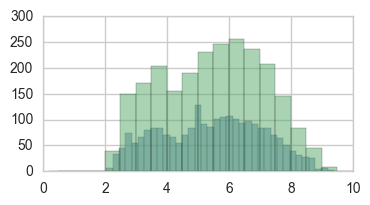

In [8]:
bins=linspace(0,10)
df['db_rating'].hist(bins=bins, alpha=0.5)

bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))

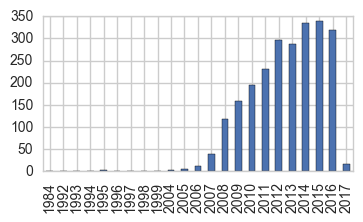

In [9]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

# 2. General Analysis for All Data

In [10]:
df = df.query("db_ratings_count > 5000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,0.094546,0.155732,0.372132,0.261503,0.116092,6.297291,69874.108374,2012.146141,6.188834,1.772543,1.939480
std,0.144908,0.113726,0.133201,0.149582,0.114867,1.324009,84785.789062,3.056034,1.807627,0.241175,0.392864
min,0.001000,0.003000,0.012000,0.004000,0.008000,2.300000,5005.000000,1984.000000,2.000000,1.206715,1.303840
25%,0.010000,0.050000,0.274000,0.130250,0.039000,5.400000,14161.000000,2010.000000,6.000000,1.605677,1.697351
50%,0.031000,0.135000,0.395000,0.252000,0.072500,6.400000,38063.000000,2012.000000,6.000000,1.739155,1.853645
75%,0.102750,0.250750,0.483000,0.401000,0.151000,7.300000,92069.000000,2014.000000,8.000000,1.896470,2.055480
max,0.942000,0.422000,0.619000,0.582000,0.676000,9.200000,709045.000000,2017.000000,10.000000,3.397793,5.154028


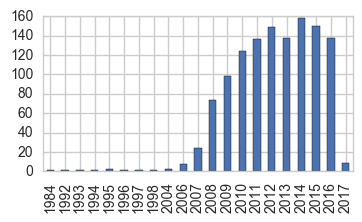

In [11]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

In [12]:
df['std'].hist(alpha=0.5, figsize=(4,2))

plt.figure()
bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXQAAADNCAYAAACo0YtaAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAHctJREFUeJzt3X9M3PX9B/Bn6cHdYcuv4/hRAsHSrvxo5ZAfplbs0tSa
JaXdPNpo4iZVR6YHXdzmVlyMta5Di9M5qJ1FZgzNklYuxrQudXNfVyetlgIVMqrxUJTDK3dHgVL5
cJ877vP9Y/bmlVLuFwd8eD4SQu79fn8+7/fLN316fO743BJJkiQQEdGCFzHXCyAiotBgoBMRyQQD
nYhIJhjoREQywUAnIpIJBjoRkUww0ImIZIKBTkQkEwx0IiKZ8DvQ3333XWRnZyMnJ8fz/ec//zkA
wGw2Y9euXSgoKMDWrVvR2trqdezp06dRVlYGnU6HiooK9Pf3h6YKIiLyP9BNJhM2bdqE1tZWtLa2
4oMPPsD+/fsBAI8++iiSkpJgNBqxbds2VFVV4eLFiwAAi8UCg8EAvV4Po9GI+Ph4GAyG0FZDRLSI
+R3ovb29WL16NRISEqDRaKDRaLBs2TKcOXMGZrMZ+/btw8qVK1FZWQmdToeWlhYAwLFjx7Bu3TpU
VFQgKysLtbW1GBgYQFtbW8iLIiJajAIK9JtvvnlKe1dXF/Ly8qBUKj1thYWFOH/+vKe/uLjY06dS
qZCbm4vOzs5A1k1ERNfwO9C/+OIL/Pvf/8bdd9+Nu+66C3/4wx/gdDphs9mQlJTkNVaj0WBwcBAA
YLVap/QnJiZ6+omIKDgKfwZ//fXXmJiYgFKpxEsvvQSz2Yz9+/djYmICgiAgKirKa3xUVBREUQQA
TExM3LB/Ji6XC6Ojo1AqlYiI4JtziGjhc7vdcDgciI2NhULhVxxfl19nWLFiBT766CPExMQAALKz
s+F2u/H444/jnnvuweXLl73Gi6IIlUoFAFAqlVPCWxRFz7lmMjo6ir6+Pn+WS0S0IGRmZkKj0QR9
Hr//l3BtAGdlZcHhcCAxMRG9vb1efXa7HVqtFgCQnJwMm802pT8nJ8enea9em09MTMSyZcv8XfaC
5XA4YLFYkJqa6vX6hNyxbta9GFy5cgV2uz1kNfsV6B988AF++ctf4v333/csoKenB/Hx8SgqKsJf
/vIXiKLoubTS3t6OoqIiAEB+fj46Ojo85xIEAT09PaiurvZp7quXWZYtWxaS/5MtFOPj47BYLIiL
i0N0dPRcLydsWDfrXizsdnvILiP7dZaCggKo1Wr89re/xRdffIFTp06hrq4OP/3pT1FcXIzU1FTs
2bMHJpMJhw8fRnd3N8rLywEAer0eHR0daGxshMlkQk1NDTIyMlBSUhKSQoiIFju/Av2mm25CU1MT
hoeHUV5ejieffBL33nsvHnzwQURERODQoUOw2WzQ6/U4fvw4Dh48iJSUFABAWloa6uvrYTQasWPH
DoyNjaGhoWFWiiIiWoz8voaelZWFpqam6/alp6ejubl52mNLS0tx8uRJf6ckIiIf8P1/REQywUAn
IpIJBjoRkUww0ImIZIKBTkQkE8HfPIAWhMnJSc+96cMhJSUFS5cuDdt8RMRAXzQuXryI1986i5jY
hFmf6/LoJTywvQRpaWmzPhcR/Q8DfRGJiU1AQmLyXC+DiGYJr6ETEckEA52ISCYY6EREMsFAJyKS
CQY6EZFMMNCJiGSCgU5EJBMMdCIimWCgExHJBAOdiEgmGOhERDIRcKBXVlaipqbG89hsNmPXrl0o
KCjA1q1b0dra6jX+9OnTKCsrg06nQ0VFBfr7+wNfNRERTRFQoL/99tt4//33vdoMBgOSkpJgNBqx
bds2VFVVeW7XarFYYDAYoNfrYTQaER8fD4PBEPzqiYjIw+9AHx0dRV1dHW655RZP25kzZ9Df3499
+/Zh5cqVqKyshE6nQ0tLCwDg2LFjWLduHSoqKpCVlYXa2loMDAygra0tdJUQES1yfgf6c889h+3b
tyMrK8vT1tXVhby8PCiVSk9bYWEhzp8/7+kvLi729KlUKuTm5qKzszOYtRMR0Xf4FehnzpxBe3v7
lMslNpsNSUlJXm0ajQaDg4MAAKvVOqU/MTHR009ERMHz+QMuRFHE3r178dRTTyEqKsqrTxCEKW1R
UVEQRREAMDExccN+fzgcDoyPj/t93EIlCILX92DO43I54XQ6Q7GsG3K5nBAEIah9ClXdCw3rXlx1
OxyOkJ7P50Cvr6/H2rVrcfvtt0/pUyqVGB0d9WoTRREqlcrTf214i6KImJgYvxdssVhgsVj8Pm6h
6+vrC+p4q9WKoaHLcLln/52qo8ND+Owz55SfiUAEW/dCxbopED4H+t/+9jcMDQ2hoKAAADzP9N55
5x387Gc/g8lk8hpvt9uh1WoBAMnJybDZbFP6c3Jy/F5wamoq4uLi/D5uoRIEAX19fcjMzIRarQ74
PLGxsfjU2od4jTaEq7s+RYQbq1dnYsWKFQGfI1R1LzSse3HVPTIyEtInqD4H+pEjR+ByuTyP6+rq
AACPP/44BgYGcPjwYYii6Lm00t7ejqKiIgBAfn4+Ojo6PMcKgoCenh5UV1f7vWClUono6Gi/j1vo
1Gp1UHWr1WooFJGIjIwM4aquT6GIDHq9V4XqPAsN614cQn2Jyeffv1NTU5Genu75uummm3DTTTch
PT0dJSUlSE1NxZ49e2AymXD48GF0d3ejvLwcAKDX69HR0YHGxkaYTCbU1NQgIyMDJSUlIS2GiGgx
C8kF1YiICLz88suw2WzQ6/U4fvw4Dh48iJSUFABAWloa6uvrYTQasWPHDoyNjaGhoSEUUxMR0bd8
vuRyrdraWq/H6enpaG5unnZ8aWkpTp48Geh0sjQ5Oen5a9rpCIIAq9WK2NjYoK4tWiwWuN3ugI8n
ovkv4ECn4F28eBGvv3UWMbEJ045xuZwYGrqMT619UCgCv/7d/+VniNekBHw8Ec1/DPQ5FhObgITE
5Gn7nU4nXO4IxGu0Qb2gOXLJNvMgIlrQePtcIiKZYKATEckEA52ISCYY6EREMsFAJyKSCQY6EZFM
MNCJiGSCgU5EJBMMdCIimWCgExHJBAOdiEgmGOhERDLBQCcikgkGOhGRTDDQiYhkgoFORCQTDHQi
IpnwO9C/+uorPPTQQygoKMCmTZvQ1NTk6TObzdi1axcKCgqwdetWtLa2eh17+vRplJWVQafToaKi
Av39/cFXQEREAPwMdEmSUFlZicTERLz11lvYu3cvDh06hLfffhsA8OijjyIpKQlGoxHbtm1DVVWV
50OQLRYLDAYD9Ho9jEYj4uPjYTAYQl8REdEi5Veg2+125Obm4qmnnkJGRgbuvPNOrF+/Hu3t7fjw
ww9hNpuxb98+rFy5EpWVldDpdGhpaQEAHDt2DOvWrUNFRQWysrJQW1uLgYEBtLW1zUphRESLjV+B
rtVq8cILLyA6OhoA0N7ejnPnzqGkpAQff/wx8vLyoFQqPeMLCwtx/vx5AEBXVxeKi4s9fSqVCrm5
uejs7AxFHUREi17AL4pu2rQJ999/P3Q6HbZs2QKbzYakpCSvMRqNBoODgwAAq9U6pT8xMdHTT0RE
wVEEemB9fT3sdjv27t2L3//+9xAEAVFRUV5joqKiIIoiAGBiYuKG/b5yOBwYHx8PdNnziiAIcLmc
cDqd04652nejMb5wTboA12TQ5/FpLpcTgiAEtU+CIHh9XyxY9+Kq2+FwhPR8AQd6Xl4eAGDPnj34
1a9+hfLycly+fNlrjCiKUKlUAAClUjklvEVRRExMjF/zWiwWWCyWQJc9r1itVgwNXYbLPfMvSiMj
I0HNNTw8DEXkBFTRtqDO44vR4SF89pkTo6OjQZ+rr68v+AUtQKybAuFXoA8NDaGzsxObN2/2tK1a
tQpOpxNarRa

## 2.1 standard deviation

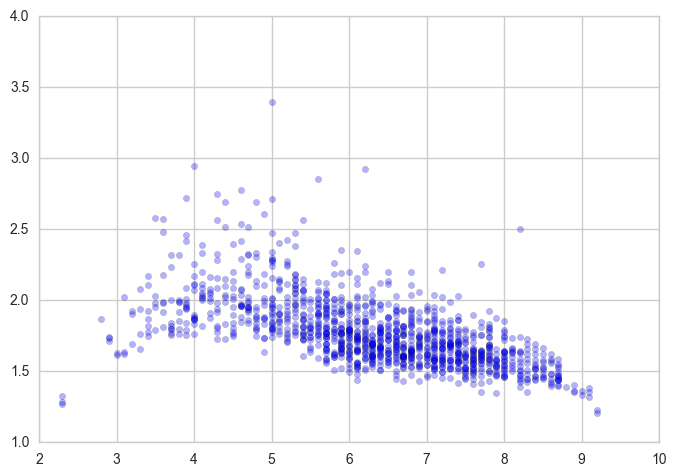

In [13]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,1,4])
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, 'all.html', show_ratings_num=False)

In [14]:
movie_list(df.sort_values(by='std',ascending=False))

## 2.2 Ratings Number Comparison

In [15]:
for num in [0, 5000, 20000, 50000, 100000, 200000]:
    sub_df = df.query("db_ratings_count > @num")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,1,4])
    plt_configure(title = num, figsize=(2.5,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPoAAAEBCAYAAABRzrhTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzsvXlwXGeZ7/8553T36V0ttVpSS9ZiS7YjW7ZlO7Gz2TAG
k+HHnYEZksC9Q8FUccvBNQNTRZXrEhhuKBgyDIEMQyiSW4GhuHCHCVUThkyFZMaQEMfO5niJLEuO
drWW1tKSeu8+3Wf5/dGSbFmWkWTJS3Q+/9h6zznv+7TU3/O8y/O+j2AYhoGJicl7GvFGG2BiYrL6
mEI3MVkDmEI3MVkDmEI3MVkDmEI3MVkDmEI3MVkDmEI3MVkDmEI3MVkDmEI3MVkDmEI3meX48ePc
f//9NDc384EPfIB//ud/vtEmmawQptBNADh79iyf+9znaGho4Ac/+AF/+qd/ymOPPcbTTz99o00z
WQEEM9bdBOCzn/0syWSSZ555ZrbsO9/5Dv/6r//Ka6+9hs1mu4HWmVwrpkc3IZfL8dZbb/HBD35w
Tvl9991HMpnk1KlTN8gyk5XCFLoJAwMD5PN51q9fP6e8trYWgJ6enhthlskKYgrdhGQyCYDL5ZpT
PvNzKpW67jaZrCym0E3Qdf2q1wVBuE6WmKwWptBN8Hg8wHzPPePpZ66b3LqYQjehpqYGSZIIhUJz
yvv7+wGor6+/EWaZrCCm0E2w2Wzcfvvt/Nd//dec8v/8z//E6/Wyffv2G2SZyUphCt0EgMOHD9PS
0sLf/M3fcOzYMb73ve/xk5/8hM997nPIsnyjzTO5RsyAGZNZfvvb3/LEE0/Q29tLeXk5f/EXf8Ff
/uVf3mizTFYAU+gmJmuAZXfdDx06xMMPP7zg9ba2Nh588EGam5t54IEHOH/+/HKbMjExuUaWJfTn
n3+eY8eOLXg9k8lw6NAh7rjjDp599lmam5t56KGHyGazyzbUxMRk+SxZ6LFYjMcee+yqM7HPP/88
DoeDI0eOsGHDBr7yla/gcrl48cUXr8lYExOT5bFkof/DP/wDH/3oR6+6ttrS0sLu3bvnlO3atYsz
Z84s3UITE5NrZklCf/311zl16hR/9Vd/ddX7xsbGKCsrm1Pm9/sZHR1duoUmJibXzKKFnsvl+NrX
vsYjjzzyB/cmZ7PZeffYbDZyudzyrDQxMbkmLIu98YknnqCpqYm77777D94ry/I8UedyOex2+6IN
U1WVWCyGLMuIohnXY7I20XUdRVEoKirCYlm0XOex6Cd/85vfMDExwc6dOwHI5/NAIUzy9OnTc+4t
Ly9nfHx8TlkkEiEQCCzasFgsRl9f36LvNzF5L1NXV4ff71/284sW+s9//nNUVZ39+bHHHgPgyJEj
8+7dsWPHvLPGTp8+zeHDhxdt2EzYZWlpKW63e9HPLRZFUQiHwwSDwVUL8VztNsz6b2z916ONZDJJ
JBK55roXLfRgMDjn55lDCaqrq4GCx/Z4PMiyzH333cfjjz/Oo48+yic+8Ql+8YtfkMlk+PCHP7xo
w2a66263+5reZAuRTqcJh8P4fD6cTueK13892jDrv7H1X682IpHINQ9fV2zwe++99/LCCy8ABXE+
9dRTvP3223z84x/n3LlzPP3000sao5uYmKwcyx7d//3f//2cny9cuDDn523btvHss88ut3oTE5MV
xJzONjFZA5hCNzFZA5hCNzFZA5hCNzFZA5hCNzFZA5hCNzFZA5hCNzFZA5hCNzFZA5hCNzFZA5hC
NzFZA5hCNzFZA5hCNzFZA5hCNzFZA5hCNzFZA5hCNzFZA5hCNzFZA5hCNzFZA5hCNzFZA5hCNzFZ
A5hCNzFZAyxZ6KFQiM9+9rPs3LmTAwcO8OMf/3jBew8fPsxtt91GY2Pj7L+vvPLKNRlsYmKydJZ0
CqxhGBw6dIgdO3bw61//mr6+Pr74xS9SUVHBRz7ykXn39/T08N3vfpc777xztszr9V671SYmJkti
SUKPRCJs2bKFRx55BKfTSU1NDXfddRenTp2aJ/RcLsfg4CBNTU2rkoDBxMRk8Syp6x4IBHj88cdn
M1KcOnWKkydPsnfv3nn39vb2IgjCbCYXExOTG8eyEzgcOHCAcDjM+9//fj70oQ/Nu97d3Y3b7ebI
kSO8+eabBINBPv/5z7N///5rMtjExGTpLHvW/YknnuCpp56ivb2db37zm/Ou9/T0oCgK+/bt48c/
/jHve9/7OHz4MOfPn78mg01MTJbOsj361q1bAXj44Yc5cuQIX/rSl+bkb/7rv/5rPvOZz+DxeADY
vHkzra2tPPPMM3z9619fdDuKopBOp5dr5oJkMpk5/64Gq92GWf+Nrf96tKEoyorUsyShT0xMcObM
GT74wQ/OljU0NJDP50kmk/h8vjn3z4h8hvr6erq7u5dkYDgcJhwOL+mZpXA9crCvdhtm/Te2/uvV
xrWwJKEPDg7y+c9/nldeeYWysjIAzp07R0lJyTyRP/zwwwiCwKOPPjpbduHCBTZt2rQkA4PB4Ly6
V4JMJkNfXx91dXU4HI4Vr/96tGHWf2Prvx5tRKPRFXF0SxL6tm3baGpq4stf/jIPP/wwg4ODfOc7
3+Hw4cPA3BzpBw4c4Itf/CJ79uxh165dPPfcc5w+fZpvfOMbSzJQluVVyzsN4HA4VrX+69GGWf+N
rX8121ipIcGSJuNEUeSHP/whTqeTT37yk3z1q1/l05/+NJ/61KeAuTnSDx48yCOPPMKTTz7Jn/zJ
n/Dyyy/zox/9iMrKyhUxfK0TjSY4fryX116b5PjxXqLRxI02yeQmZsmTcYFAgO9///tXvHZ5jvT7
77+f+++/f3mWmSxINJrg6NEpBKEBVZWJx6s5enSUgwfB5/P84QpM1hzmppZbkJaWMez2mjlldnsN
LS1jN8gik5sdU+i3IKmUdMXydPrK5SYmptBvQVwu7YrlTueVy01MTKHfgmzfXkY2G5pTls2G2L69
7AZZZHKzYwr9FsTn83DwYDFFRd1YLD14vV0cPFhsTsSZLMiyQ2BNbiw+n4d77qmjpCRDY+P6VV8n
Nrm1MT26ickawBS6ickawBS6ickawBS6ickawBS6ickawBS6ickawBS6ickawBS6ickawBS6icka
wBS6ickawBS6ickawBS6ickawBS6ickawBS6ickawBS6ickaYMlCD4VCfPazn2Xnzp0cOHCAH//4
xwve29bWxoMPPkhzczMPPPCAmXfNxOQGsSShG4bBoUOHKC0t5de//jVf+9rXePLJJ3n++efn3ZvJ
ZDh06BB33HEHzz77LM3NzTz00ENks9kVM97ExGRxLEnokUiELVu28Mgjj1BTU8P+/fu56667OHXq
1Lx7n3/+eRwOB0eOHGHDhg185StfweVy8eKLL66Y8SYmJotjSUIPBAI8/vjjs8cWnTp1ipMnT7J3
795597a0tLB79+45Zbt27eLMmTPXYK6JiclyWPaZcQcOHCAcDvP+97+fD33oQ/Ouj42NzUuo6Pf7
6erqWm6TJiYmy2TZQn/iiSeIRCI88sgjfPOb3+Rv//Zv51zPZrPYbLY5ZTabjVwut6R2zPzoZv03
a/3Xo40bkh/9UrZu3QoU0iMfOXKEL33pS1gsF6uTZXmeqHO5HHa7fUntmPnRzfpv9vqvVxvXwpKE
PjExwZkzZ/jgBz84W9bQ0EA+nyeZTM7JY15eXs74+Pic5yORCIFAYEkG3qr50aPRBKdODdHXN0Fd
nZ/du6tW/Nz1Wz2/+K1e//Vo44bkRx8cHOTzn/88r7zyCmVlhawg586do6SkZJ4Yd+zYwdNPPz2n
7PTp07O51BfLrZgfPRpNcOKEgiBsRVUHUJRqTpwY5eBB56okWbhe+cWj0QQtLWOkUhIul8b27WUr
8nnM/OgLc0P

## 2.3 Time Shift

In [16]:
for year in range(2008,2017):
    sub_df = df.query("year == @year")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,1,4])
    plt_configure(title=year, figsize=(2.5,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPoAAAEBCAYAAABRzrhTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzt3XtYVPW+P/D3zMDcmOEqd8FRkJsoNxEviP1I8piVtVOr
vdu1z+mEcVJ7sth5aR8ryy6aZbbTQvfp9tjWfbKyzDzaBbUsESRQMWW4iXIbYGDuA8z6/THNyAjo
DKxBZH1ez9NjfGfN5/sd9D3rvr48hmEYEEJGNf6NHgAhxP0o6IRwAAWdEA6goBPCARR0QjiAgk4I
B1DQCeEACjohHEBBJ4QDKOijDMMw+OSTT3DXXXchJSUFc+fOxcsvvwytVmtfpq6uDo899hjS09Mx
ffp0PPfccw6vA4Ber8fzzz+PzMxMpKSkIDc3F9XV1Q7LGAwGvPrqq8jOzkZqairuv/9+HD9+fFg+
J3ENjy6BHV3ee+89bNmyBf/5n/+J6dOno6amBm+++SYSExOxc+dOaDQa3HnnnQgKCkJeXh5UKhU2
btyIpKQkFBQU2Os89thjKC8vR35+PmQyGbZu3Yr29nbs378fcrkcAPD000/j22+/xVNPPYWoqCjs
3r0bhw8fxq5duzBlypQb9Ssg/WHIqGGxWJj09HRm/fr1Du379+9n4uLimNOnTzPbt29nkpOTGbVa
bX+9sLCQiY2NZUpKShiGYZiSkhImNjaWOXr0qH2Z1tZWJjk5mdm+fTvDMAxjNBqZhIQE5q233rIv
093dzcyZM4dZvXq1Oz8mGQTadB9FtFotFi5ciAULFji0T5gwAYB1k/3YsWOYOnUqfHx87K9nZmbC
y8sLhYWFAIBjx45BKpVi1qxZ9mX8/f0xbdo0+zJdXV2wWCzw8vKyLyMQCCCXy6FWq932GcngUNBH
EblcjrVr1yIlJcWh/fDhwwCAiRMnoqqqCgqFwuF1Pp+PsWPH2vfBq6qqEBERAR6P57BcZGSkfRmZ
TIY//OEP+PDDD1FaWgqNRoN//OMfqKysxMKFC930CclgedzoARD3+vXXX1FQUIDs7GxER0dDo9FA
JpP1Wc7Ly8t+QM6ZZQDgySefREVFBe6//34AAI/Hw4oVKzBv3jw3fRoyWBT0Uay4uBh5eXmIjIzE
yy+/DACwWCwDLs/nWzfwmGscn7Ut09bWhkWLFkEoFGLTpk0ICgrC0aNH8fe//x0SiQR/+ctf2Psg
ZMgo6KPU119/jdWrV2PChAkoKCiAt7c3AOvmvU6n67O8VqtFSEgIAOtmeWtra7/L2I6479mzB01N
Tfi///s/REREAACmTZsGi8WCzZs345577nE4DkBuLNpHH4V27tyJp556Cqmpqfjoo48wZswY+2vj
x49HXV2dw/IWiwX19fWIioqyL1NfX9+nbl1dnf3A3uXLlxEQEGAPuU16ejq6urpQW1vL9sciQ0BB
H2X++c9/YuPGjbj99ttRUFDQZ1971qxZOHHiBNrb2+1tR48ehcFgQGZmJgDrUXidToejR4/al2lr
a0NRUZF9mQkTJqCtrQ01NTUO9YuLi8Hn8xEeHu6mT0gGgy6YGUVUKhVuvfVWBAYG4tVXX4WHh+Oe
mW3tu2DBAgQHB2PZsmVob2/Hpk2bkJKSgu3bt9uXfeihh/Dbb7/h6aefhq+vL95++210dnZi3759
kMvl0Gq1uOeeewAAjz/+OEJCQvDjjz/if/7nf/CnP/0Jq1evHr4PTq6Lgj6KfPrpp3j22WcHfP3l
l1/G3XffjcrKSmzYsAGnTp2Cl5cX5s6di7/+9a+QSqX2ZTUaDV5++WV8++23sFgsSEtLw6pVqxxO
zalUKrz++usoLCyEwWCAQqHAn/70JyxatMidH5MMAgWdEA4Y9D56bm7uNTfPzp49iyVLliA5ORmL
Fy/GmTNnBtsVIWSIBhX0/fv348iRIwO+bjAYkJubi/T0dOzduxfJyclYunQpjEbjoAdKCBk8l4Pe
0dGBjRs3XvPupP3790MikSA/Px8TJkzA2rVr4eXlhW+++WZIgyWEDI7LQX/11VexcOFC+znX/pSV
lSEtLc2hLTU1FadOnXJ9hISQIXMp6MePH0dxcTEef/zxay7X3NyMoKAgh7aAgAA0NTW5PkJCyJA5
HXSz2YznnnsO69atg1AovOayRqOxzzJCoRBms3lwoySEDInT17pv3boViYmJmDlz5nWXFYlEfUJt
NpshFoudHlh3dzc6OjogEonsN1IQwjUWiwUmkwk+Pj59LoByhdPv/Prrr9Ha2mq/17mrqwsAcPDg
QZSUlDgsGxwcjJaWFoc2lUqFwMBApwfW0dHR5/JKQrhKoVAgICBg0O93Ougff/wxuru77T9v3LgR
AJCfn99n2aufPwYAJSUlyMvLc3pgIpEIADBmzJh+740eKpPJhIaGBoSGhtr7utn6oPo3tv5w9KHV
aqFSqYZc2+mgh4aGOvxse4SQ7fpplUoFuVwOkUiEefPmYfPmzdiwYQPuu+8+fPLJJzAYDJg/f77T
A7NtrstksiF9kw1Er9ejoaEBvr6+Dpd+3kx9UP0bW3+4+lCpVEPefWVt5zczMxMHDhwAYA3n9u3b
cfLkSdx7770oLy9HQUGBS/vohBD2DHrv3vbEEptz5845/Dx58mTs3bt3sOUJISyiw9mEcAAFnRAO
oKATwgEUdEI4gIJOCAdQ0AnhAAo6IRxAQSeEAyjohHAABZ0QDqCgE8IBFHRCOICCTggHUNAJ4QAK
OiEcQEEnhAMo6IRwAAWdEA6goBPCARR0QjjA5aDX1dXhkUceQUpKCrKzs7Fz584Bl83Ly0NcXBzi
4+PtfxYWFg5pwIQQ17n0FFiGYZCbm4ukpCR88cUXqKmpwcqVKxESEoIFCxb0Wb6qqgqvv/46pk+f
bm/z9vYe+qgJIS5xKegqlQoJCQlYt24dpFIpIiMjMWPGDBQXF/cJutlsRn19PRITE90yAQMhxHku
bboHBgZi8+bN9hkpiouLUVRUhIyMjD7LVldXg8fj2WdyIYTcOIOewCE7OxsNDQ245ZZbcNttt/V5
XalUQiaTIT8/H7/88gtCQ0OxfPlyZGVlDWnAhBDXDfqo+9atW7F9+3ZUVFTgpZde6vN6VVUVTCYT
Zs+ejZ07d2LOnDnIy8vDmTNnhjRgQojrBr1GnzRpEgBg9erVyM/Px6pVqxzmb162bBkefvhhyOVy
AEBsbCxOnz6N3bt344UXXnC6H5PJBL1eP9hhDshgMDj86Q7u7oPq39j6w9GHyWRipY5LQW9tbcWp
U6cwd+5ce1t0dDS6urqg1Wrh6+vrsLwt5DZRUVFQKpUuDbChoQENDQ0uvccVwzEHu7v7oPo3tv5w
9TEULgW9vr4ey5cvR2FhIYKCggAA5eXl8Pf37xPy1atXg8fjYcOGDfa2c+fOISYmxqUBhoaG9qnN
BoPBgJqaGigUCkgkEtbrD0cfVP/G1h+OPtRqNSsrOpeCPnnyZCQmJmLNmjVYvXo16uvrsWnTJuTl
5QFwnCM9OzsbK1euxLRp05Camop9+/ahpKQE69evd2mAIpHIbfNOA4BEInFr/eHog+rf2Pru7IOt
XQKXDsbx+Xy88847kEqluP/++/G3v/0NDz30EB588EEAjnOk5+TkYN26ddi2bRvuvPNOfP/999ix
YwfCwsJYGTghxHkuH4wLDAzEW2+91e9rV8+RvmjRIixatGhwIyOEsIZuaiGEAyjohHAABZ0QDqCg
E8IBFHRCOICCTggHUNAJ4QAKOiEcQEEnhAMo6IRwAAWdEA6goBPCARR0QjiAgk4IB1DQCeEACjoh
HEBBJ4QDKOiEcAAFnRAOoKATwgEUdEI4wOWg19XV4ZFHHkFKSgqys7Oxc+fOAZc9e/YslixZguTk
ZCxevJjmXSP

# 3. Popular Moives

In [17]:
df = df.query("db_ratings_count > 20000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,0.064362,0.128336,0.366848,0.301069,0.139374,6.645431,101939.954315,2012.114213,6.624365,1.726592,1.869946
std,0.112856,0.107292,0.131166,0.144619,0.126499,1.239202,90496.468750,3.130720,1.643134,0.210347,0.307154
min,0.001000,0.003000,0.021000,0.004000,0.009000,2.300000,20064.000000,1992.000000,2.000000,1.206715,1.320606
25%,0.007000,0.035000,0.265750,0.177000,0.049750,5.900000,39881.250000,2010.000000,6.000000,1.579274,1.666133
50%,0.020000,0.090000,0.385000,0.318000,0.094000,6.800000,70970.000000,2012.000000,6.000000,1.691153,1.815489
75%,0.067000,0.211250,0.476000,0.430000,0.187250,7.600000,130970.500000,2015.000000,8.000000,1.844288,1.985447
max,0.929000,0.400000,0.595000,0.569000,0.676000,9.200000,709045.000000,2017.000000,10.000000,2.689535,3.856423


In [18]:
df['std'].hist(alpha=0.5, figsize=(4,2))

plt.figure()
bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXQAAADNCAYAAACo0YtaAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzt3X1UVHXCB/AvMDAM8TLIm8jmIdEcaBUQoaNFnlhsdzuR
uqi71umEZexuKp3tbbU9rW3m0Y3MVIyT2nJazA4pvZh71t3tZWvVUgoMC/RpIHpAx3lRhpcc5oW5
zx89zjYhMMP8mBmv3885HJp779zfd2b4fRvvzNwJkSRJAhERXfFCAx2AiIjEYKETEckEC52ISCZY
6EREMsFCJyKSCRY6EZFMsNCJiGSChU5EJBMsdCIimfCq0PV6PSoqKnDjjTdi3rx52LRpE2w2GwDg
mWeegUajQWZmpuv3q6++6rru0aNHUVJSgpycHJSVlaGzs1PsLSEiusqFePPR/1/+8pdQq9V4/PHH
YTab8cQTT6C4uBiPPfYY7rvvPsydOxeLFi1ybR8dHQ2lUgmdTofbb78dDz30EAoLC1FVVYW2tjYc
OHBgXG4UEdHVyONn6O3t7WhubsbGjRuRkZGBvLw8VFRU4ODBgwCAtrY2ZGVlISEhwfWjVCoBAPv2
7cOMGTNQVlaGjIwMbNy4EWfOnEFDQ8P43CoioquQx4WelJSE3bt3Y8KECa5lkiShr68P/f390Ov1
SE9Pv+x1P//8c+Tn57suR0ZGIisrC01NTWNPTkREbjwu9JiYGNx0002uy5IkYc+ePZg7dy7a29sR
EhKC6upqzJs3DwsWLMBbb73l2tZgMCA5Odltf4mJidDr9QJuAhERAYBirFd89tlncerUKezfvx9f
fPEFQkNDkZGRgXvuuQfHjx/Hk08+iejoaBQXF2NgYAARERFu14+IiHC9oOoJh8OBnp4eKJVKhIby
zTlEdOVzOp2wWq2Ii4uDQjHmOnYZ0x4qKytRW1uLF154AVOnTsXUqVNRVFSE2NhYAMD111+Pjo4O
vPbaayguLoZSqRxS3jabzbW9J3p6etDR0TGWuEREQS09PR0JCQk+78frQl+/fj3q6upQWVmJ4uJi
1/IflvOUKVNw7NgxAEBKSgqMRqPbepPJhMzMTI/HvfQCa2JiIqKjo72NPa6sVit0Oh1SU1NdOX1h
Mpnw98OncE205//DuxyHYxDfftuPa66JhkIRNux23/b34uc3a5CYmOjTeN4QfZ+JxGzeC9ZcQHBn
6+/vh8lkEpbLq0KvqqpCXV0dtmzZgvnz57uWb9u2DU1NTaipqXEta21txXXXXQcAyM7ORmNjo2ud
xWJBS0sLVq9e7fHYlw6zREdHC/k/mUgXL16ETqeDWq1GVFSUz/sbGBiAIlKNa9QpPu3HbrfjW1so
ouKSEB4ePux2Vkeo3+9X0feZSMzmvWDNBQR3NuC7J3CiDiN7vJe2tjZUV1ejvLwcubm5MJlMrp9b
b70VDQ0NqKmpQWdnJ/bu3YsDBw5gxYoVAIDS0lI0NjZi165d0Gq1WLt2LSZPnoyCggIhN4KIiLx4
hv7ee+/B6XSiuroa1dXVAL57p0tISAhaW1uxbds2bN26FVu3bkVaWho2b96MmTNnAgDS0tKwfft2
bNiwAS+++CJmzZqFqqqq8blFRERXKY8Lvby8HOXl5cOuLyoqQlFR0bDrCwsLcejQIe/SERGRx/j+
PyIimWChExHJBAudiEgmWOhERDLBQicikgkWOhGRTLDQiYhkgoVORCQTvp+vka54TucgdDqdX8e0
WCwYHBz065hEcsdCJ/SaL+DND84iddK3fhvzwnkD8qcF11kzia50LHQCAMTEqjEh0bezO3rD4bAD
sPttPKKrAY+hExHJBAudiEgmWOhERDLBQicikgkWOhGRTLDQiYhkgoVORCQTLHQiIpnwqtD1ej0q
Kipw4403Yt68edi0aRNsNhsAoKurC8uXL0dubi7uuOMOHDlyxO26R48eRUlJCXJyclBWVobOzk5x
t4KIiLwr9IqKClitVuzduxfPP/88PvjgA2zduhUA8OCDDyI5ORn19fW48847sWrVKpw7dw4AoNPp
sHLlSpSWlqK+vh7x8fFYuXKl+FtDRHQV87jQ29vb0dzcjI0bNyIjIwN5eXmoqKjAwYMH8cknn6Cr
qwtPP/00pkyZgvLycuTk5GD//v0AgNdffx0zZsxAWVkZMjIysHHjRpw5cwYNDQ3jdsOIiK42Hhd6
UlISdu/ejQkTJrgt7+vrw+eff44bbrgBSqXStTwvLw8nTpwAADQ3NyM/P9+1LjIyEllZWWhqavI1
PxER/T+PCz0mJgY33XST67IkSdizZw/mzJkDo9GI5ORkt+0TEhKg1+sBAAaDYcj6xMRE13oiIvLd
mM+2+Oyzz6K1tRX79+9HTU0NIiIi3NZHRES4XjAdGBgYcb03rFYrLl68ONbY48Jisbj9FrE/h8MO
u923sxFeuv5o+3EMOgDHoM/jecNudwAQd5+JJPrxFClYswVrLiC4s1mtVqH7G1OhV1ZWora2Fi+8
8AKmTp0KpVKJnp4et21sNhsiIyMBAEqlckh522w2xMbGej22Tqfz+5cxeKqjo0PIfgwGA86f74XD
KeZdpWazecT13d3dUIQPIDLKKGQ8T/T29gBpscLus/HAbN4L1lxAcGcTxetCX79+Perq6lBZWYni
4mIAQEpKCrRardt2JpMJSUlJrvVGo3HI+szMTK8Dp6amQq1We3298WSxWNDR0YH09HSoVCqf9xcX
F4fThg7EJyT5tB+73Q6z2Qy1Wo3w8PBht+vvMUARrnI9Xv4gDdoASMLuM5FEP54iBWu2YM0FBHc2
s9ks9AmqV4VeVVWFuro6bNmyBfPnz3ctz87Oxq5du2Cz2VyHVj777DPMnj3btb6xsdG1vcViQUtL
C1avXu11YKVSiaioKK+v5w8qlUpINpVKBYUifMQS9kZ4+Mj7UoQpoFCECRvPs0wKAHZh99l4YDbv
BWsuIDiziT4M5PG/6dva2lBdXY3y8nLk5ubCZDK5fgoKCpCamoo1a9ZAq9Vi586dOHnyJBYvXgwA
KC0tRWNjI3bt2gWtVou1a9di8uTJKCgoEHpjiIiuZh4X+nvvvQen04nq6moUFhaisLAQN998MwoL
CxEaGoodO3bAaDSitLQU77zzDnbs2IGJEycCANLS0rB9+3bU19djyZIl6OvrQ1VV1bjdKCKiq5HH
h1zKy8tRXl4+7PrJkyejtrZ22PWFhYU4dOiQd+mIiMhjPDkXEZFMsNCJiGSChU5EJBMsdCIimWCh
ExHJBAudiEgmWOhERDLBQicikgkWOhGRTLDQiYhkgoVORCQTLHQiIplgoRMRyQQLnYhIJljoREQy
wUInIpIJFjoRkUyw0ImIZIKFTkQkE2MudJvNhpKSEjQ0NLiWPfPMM9BoNMjMzHT9fvXVV13rjx49
ipKSEuTk5KCsrAydnZ2+pSciIpcxFbrNZsPDDz8MrVbrtry9vR2PPvooDh8+jCNHjuDw4cNYvHgx
AECn02HlypUoLS1FfX094uPjsXLlSt9vARERARhDobe1tWHp0qXo6uq67LqsrCwkJCS4fpRKJQBg
3759mDFjBsrKypCRkYGNGzfizJkzbs/wiYho7Lwu9OPHj2POnDmoq6uDJEmu5f39/dDr9UhPT7/s
9T7//HPk5+e7LkdGRiIrKwtNTU3epyYioiEU3l5h2bJll13e3t6OkJAQVFdX46OPPoJarcby5cux
cOFCAIDBYEBycrLbdRITE6HX68cQm4iIfsjrQh9Oe3s7QkNDkZGRgXvuuQfHjx/Hk08+iejoaBQX
F2NgYAARERFu14mIiIDNZvNqHKvViosXL4qKLYTFYnH7LWJ/Docddrvdp/1cuv5o+3EMOgDHoM/j
ecNudwAQd5+

0.964467005076


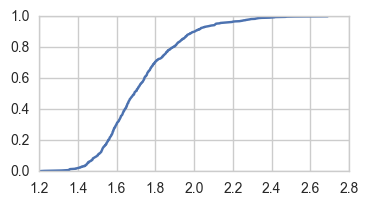

In [19]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['std'])
plt.plot(ecdf.x, ecdf.y)
plt_configure(figsize=(4,2))
print(ecdf(2.2))

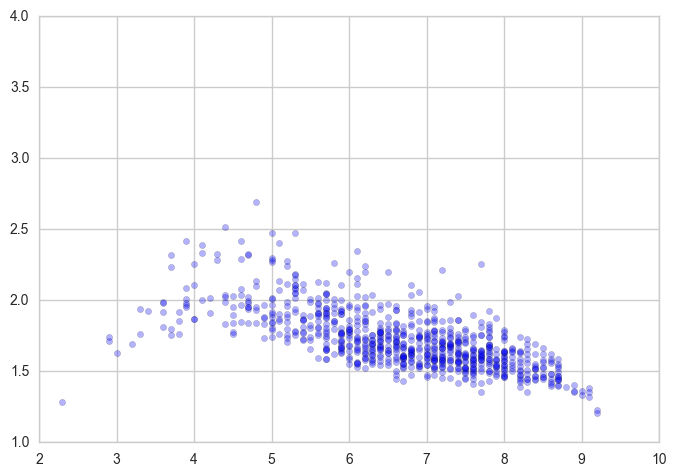

In [20]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,1,4])
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, 'popular.html', show_ratings_num=False)

In [21]:
movie_list(df.sort_values(by='std',ascending=False), len=50)

In [22]:
# sub_df = df[df['name'].str.contains("西游")]
# movie_list(sub_df.sort_values(by='std',ascending=False))

# 4. Clustering Analysis

In [23]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = df[['1_star','2_star','3_star','4_star','5_star']].as_matrix()

## 4.1 Mean Shift

In [24]:
# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(X)
# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

# labels_unique = np.unique(labels)
# n_clusters = len(labels_unique)

# print("number of estimated clusters : %d" % n_clusters)

## 4.2 K Means

In [25]:
from sklearn.cluster import KMeans
n_clusters = 6
kmeans_model = KMeans(n_clusters=n_clusters, random_state=1).fit(X)
labels = kmeans_model.labels_

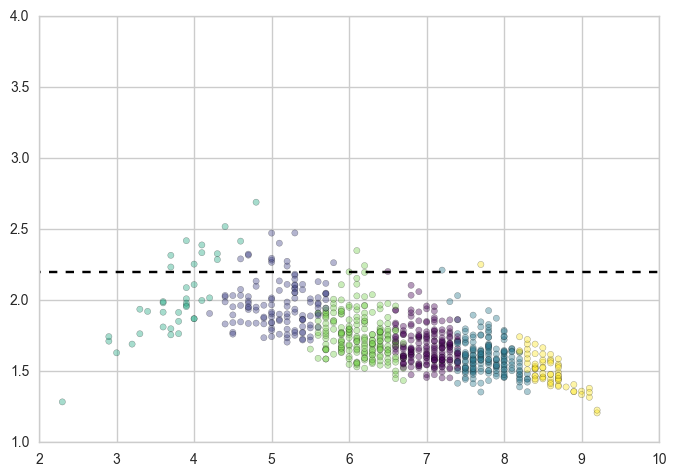

In [29]:
df['cluster'] = labels
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['db_rating'], df['std'], c=df['cluster'], alpha=0.4, cmap='viridis')
ax.axis([2,10,1,4])
plt.plot([0,10],[2.2,2.2], linestyle='--', color='black', label='0.96')
plt.show()
# turn_scatter_into_interactive(fig, scatter_plot, df, 'clusters.html', show_ratings_num=False)
turn_scatter_into_interactive(fig, scatter_plot, df, 'clusters.html', show_ratings_num=False, click=True)

In [27]:
# sub_df = df.query("db_ratings_count > 200000")
# fig, ax = plt.subplots()
# scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
# ax.axis([2,10,1,4])
# plt_configure(figsize=(2.5,2.5))
# plt.show()
# turn_scatter_into_interactive(fig, scatter_plot, df, 'temp.html', show_ratings_num=False)